# 1. Load data
## 1.1 Ground truth

In [1]:
import os
import csv
import json

import matplotlib.pyplot as plt

In [2]:
frames_true_files = os.listdir('ground_truth/true')
frames_false_files = os.listdir('ground_truth/false')

In [3]:
frames_true = [list(map(int, x.split('.')[0].split('_'))) for x in frames_true_files]
frames_false = [list(map(int, x.split('.')[0].split('_'))) for x in frames_false_files]

In [4]:
data = dict()
for x in frames_true:
    data[f'{x[0]}_{x[1]}'] = {'ground_truth': True}
for x in frames_false:
    data[f'{x[0]}_{x[1]}'] = {'ground_truth': False}
# print(data)

## 1.2 Dane z czujnika z normalizacją min-max

In [5]:
with open('min_max.csv', newline='') as f:
    reader = csv.reader(f)
    your_list = list(reader)
    for id_, value in your_list:
        if id_ in data:
            data[id_]['min_max'] = value


## 1.2 Dane z czujnika z normalizacją min-max

In [6]:
with open('z_score.csv', newline='') as f:
    reader = csv.reader(f)
    your_list = list(reader)
    for id_, value in your_list:
        if id_ in data:
            data[id_]['z_score'] = value

## 1.3 Wyniki inferencji

In [7]:
with open('inference.csv', newline='') as f:
    reader = csv.reader(f)
    your_list = list(reader)
    for id_, value in your_list:
        if id_ in data:
            data[id_]['predicted'] = value

# 2. Sortowanie danych

## 2.1 Utworzenie listy, pominiędzie ramek niezawierajacych wszystkich informacji

In [9]:
data_list = []
for id_, x in data.items():
    if 'z_score' in x and 'min_max' in x and 'predicted' in x and 'ground_truth' in x:
        id_split = id_.split('_')
        video_id = int(id_split[0])
        frame_id = int(id_split[1])
        data_list.append((id_, video_id, frame_id,  float(x['z_score']), float(x['min_max']), x['predicted'] == "True", x['ground_truth']))

print(len(data_list))

14091


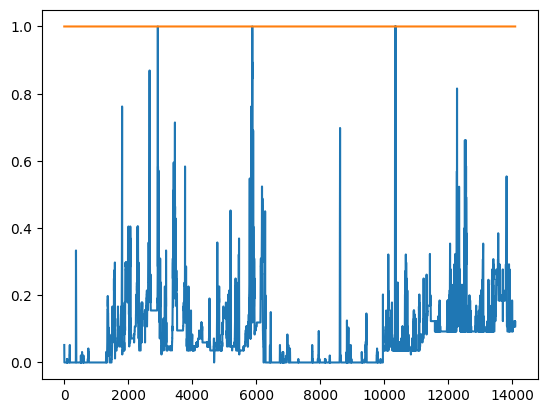

[('1_1475', 1, 1475, 1.2284722815567872, 0.05208333333333333, False, True), ('1_1476', 1, 1476, -0.1698972031950523, 0.0, False, True), ('1_1477', 1, 1477, -0.1698972031950523, 0.0, False, True), ('1_1478', 1, 1478, -0.1698972031950523, 0.0, False, True), ('1_1479', 1, 1479, -0.1698972031950523, 0.0, False, True), ('1_1480', 1, 1480, -0.1698972031950523, 0.0, False, True), ('1_1481', 1, 1481, -0.1698972031950523, 0.0, False, True), ('1_1482', 1, 1482, -0.1698972031950523, 0.0, False, True), ('1_1483', 1, 1483, -0.1698972031950523, 0.0, False, True), ('1_1484', 1, 1484, -0.1698972031950523, 0.0, False, True)]


In [15]:
import matplotlib.pyplot as plt
x = [x[4] for x in data_list]
xline = [1 for _ in data_list]
plt.plot(x)
plt.plot(xline)
plt.show()
print(data_list[:10])

In [16]:
import functools


def extract_ids(val):
    key = val[0]
    key_split = key.split('_')
    video_id = int(key_split[0])
    frame_id = int(key_split[1])
    return video_id, frame_id


def compare_id(x, y):
    v_x, f_x = extract_ids(x)
    v_y, f_y = extract_ids(y)
    v_x *= 1000_000
    v_y *= 1000_000
    return (v_x + f_x) - (v_y - f_y)
    # if v_x != v_y:
    #     return v_x > v_y
    # else:
    #     return f_x >= f_y


data_sorted = sorted(data_list, key=lambda key: (key[1], key[2]))
print(data_sorted[:100])

[('0_416', 0, 416, -0.32626265124330317, 0.0, False, False), ('0_417', 0, 417, -0.32626265124330317, 0.0, False, False), ('0_418', 0, 418, -0.32626265124330317, 0.0, False, False), ('0_419', 0, 419, -0.32626265124330317, 0.0, False, False), ('0_420', 0, 420, -0.32626265124330317, 0.0, False, False), ('0_421', 0, 421, -0.32626265124330317, 0.0, False, False), ('0_422', 0, 422, -0.32626265124330317, 0.0, False, False), ('0_423', 0, 423, -0.32626265124330317, 0.0, False, False), ('0_424', 0, 424, -0.32626265124330317, 0.0, False, False), ('0_426', 0, 426, -0.32626265124330317, 0.0, False, False), ('0_427', 0, 427, -0.32626265124330317, 0.0, False, False), ('0_428', 0, 428, -0.32626265124330317, 0.0, False, False), ('0_429', 0, 429, -0.32626265124330317, 0.0, False, False), ('0_430', 0, 430, -0.32626265124330317, 0.0, False, False), ('0_431', 0, 431, -0.32626265124330317, 0.0, False, False), ('0_432', 0, 432, -0.32626265124330317, 0.0, False, False), ('0_433', 0, 433, -0.32626265124330317,

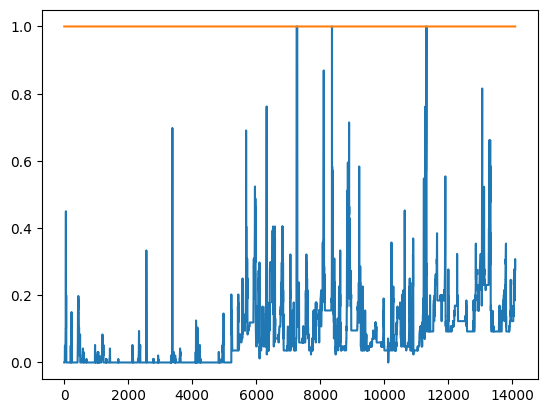

[('0_416', 0, 416, -0.32626265124330317, 0.0, False, False), ('0_417', 0, 417, -0.32626265124330317, 0.0, False, False), ('0_418', 0, 418, -0.32626265124330317, 0.0, False, False), ('0_419', 0, 419, -0.32626265124330317, 0.0, False, False), ('0_420', 0, 420, -0.32626265124330317, 0.0, False, False), ('0_421', 0, 421, -0.32626265124330317, 0.0, False, False), ('0_422', 0, 422, -0.32626265124330317, 0.0, False, False), ('0_423', 0, 423, -0.32626265124330317, 0.0, False, False), ('0_424', 0, 424, -0.32626265124330317, 0.0, False, False), ('0_426', 0, 426, -0.32626265124330317, 0.0, False, False)]


In [17]:
import matplotlib.pyplot as plt
x = [x[4] for x in data_sorted]
xline = [1 for _ in data_sorted]
plt.plot(x)
plt.plot(xline)
plt.show()
print(data_sorted[:10])

In [18]:
f = open(f"data.csv", 'w', newline='', encoding='utf-8')
writer = csv.writer(f)
writer.writerow(['id', 'video_id', 'frame_id', 'sensor_z_score', 'sensor_min_max', 'predicted', 'ground_truth'])
writer.writerows(data_sorted)
f.close()

In [19]:
f = open(f"data_village.csv", 'w', newline='', encoding='utf-8')
writer = csv.writer(f)
writer.writerow(['id', 'video_id', 'frame_id', 'sensor_z_score', 'sensor_min_max', 'predicted', 'ground_truth'])
for x in data_sorted:
    if x[1] < 2:
        writer.writerow(x)
f.close()

In [20]:
f = open(f"data_city.csv", 'w', newline='', encoding='utf-8')
writer = csv.writer(f)
writer.writerow(['id', 'video_id', 'frame_id', 'sensor_z_score', 'sensor_min_max', 'predicted', 'ground_truth'])
for x in data_sorted:
    if x[1] >= 2:
        writer.writerow(x)
f.close()